# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
path="/content/drive/MyDrive/numpy/0 elective project/ExtraaLearn.csv"
df = pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [5]:
df.shape

(4612, 15)

The dataset has 4612 rows and 15 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT4612,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 4,612 leads in the dataset.

Average age is about 46 years (most users are between 36 and 57).

Most leads are "Professional" and interacted first via "Website".

Over 49% of users have "High" profile completion.

On average, users visit the website 3.5 times and spend about 724 seconds.

Only about 30% of leads convert to paid customers.

Most users have not seen print media ads; digital and referral channels are less common.

The most common last activity is "Email Activity"

In [8]:
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


There are no null values in the data set.

In [9]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [10]:
df.dtypes

,0
ID,object
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object


In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

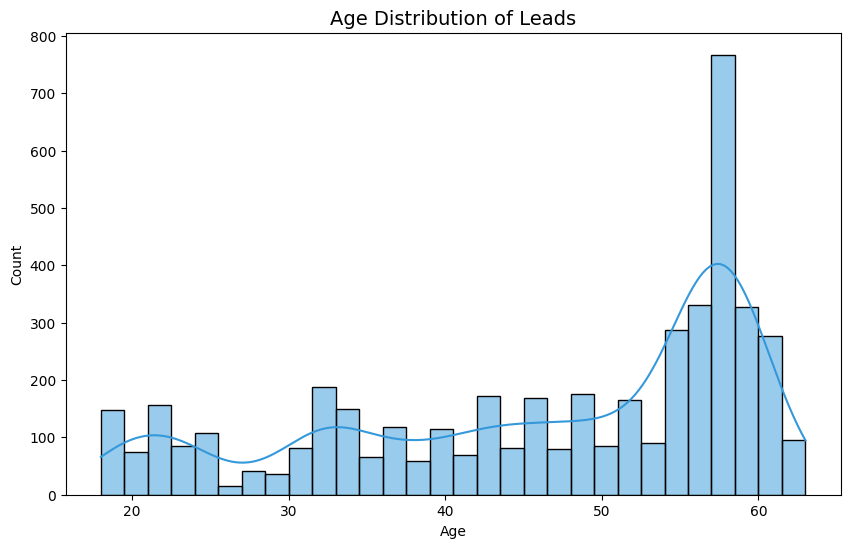

In [11]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='#3498db')
plt.title('Age Distribution of Leads', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



The age distribution shows two main peaks around 20-30 (students) and 50-60 (professionals). This pattern indicates ExtraaLearn attracts both young students and mid-career professionals. Few outliers exist above 60 years

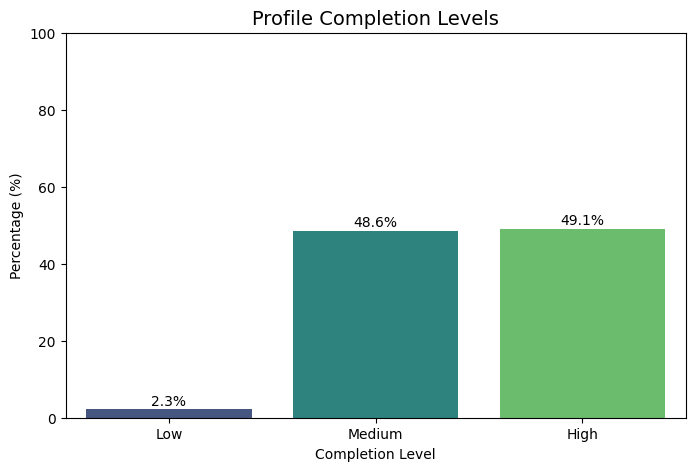

In [12]:
# profile completion

profile_data = df['profile_completed'].value_counts(normalize=True) * 100
order = ['Low', 'Medium', 'High']
profile_data = profile_data.reindex(order)

profile_df = pd.DataFrame({
    'profile_completed': profile_data.index,
    'percent': profile_data.values
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='profile_completed', y='percent', data=profile_df, palette='viridis')

for i in range(len(profile_df)):
    value = profile_df['percent'][i]
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.title('Profile Completion Levels', fontsize=14)
plt.xlabel('Completion Level')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()


Most users fill out their profiles well — either Medium or High.
Only a small number leave their profile mostly empty.

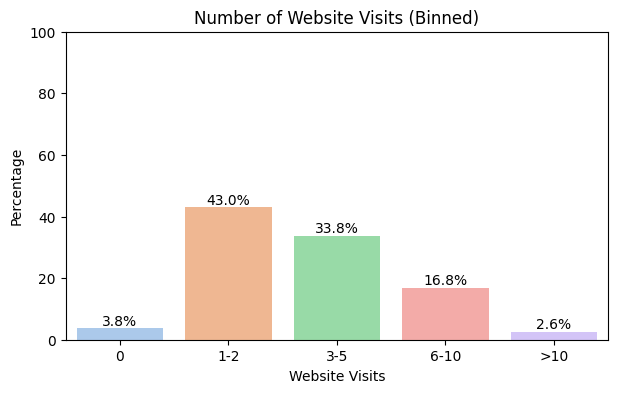

In [13]:
# Barplot for website_visits (binned)

bins = [-1, 0, 2, 5, 10, 100]
labels = ['0', '1-2', '3-5', '6-10', '>10']

df['website_visits_bin'] = pd.cut(df['website_visits'], bins=bins, labels=labels)

# Calculate percentage for each bin
visit_counts = df['website_visits_bin'].value_counts(normalize=True).sort_index()
visit_percent = visit_counts * 100

# Draw barplot
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=visit_percent.index, y=visit_percent.values, palette='pastel')

# Add percentage labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(x, height + 1, f'{height:.1f}%', ha='center', fontsize=10)

plt.title('Number of Website Visits (Binned)')
plt.xlabel('Website Visits')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()



43% of leads visit the website 1-2 times. Only 2.6% return more than 10 times, suggesting low engagement retention

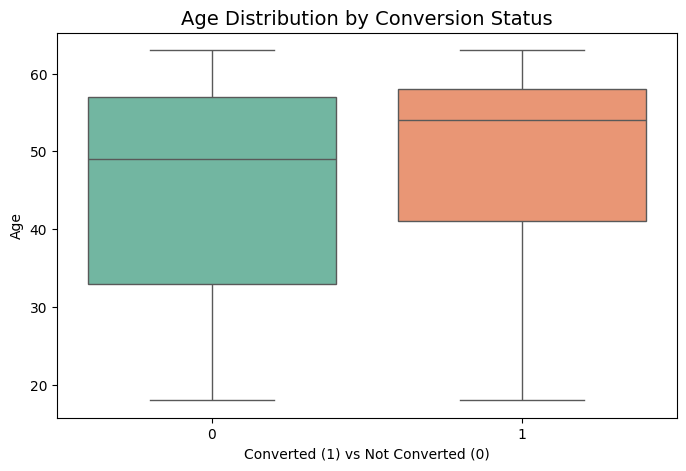

In [14]:
# Boxplot for age vs. status

plt.figure(figsize=(8,5))
sns.boxplot(x='status', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Conversion Status', fontsize=14)
plt.xlabel('Converted (1) vs Not Converted (0)')
plt.ylabel('Age')
plt.show()



People who converted are usually older (40–63 years).

People who did not convert include more young users.

Converted users have less age variation.

Older users are more likely to convert, maybe because they are more serious or can pay.

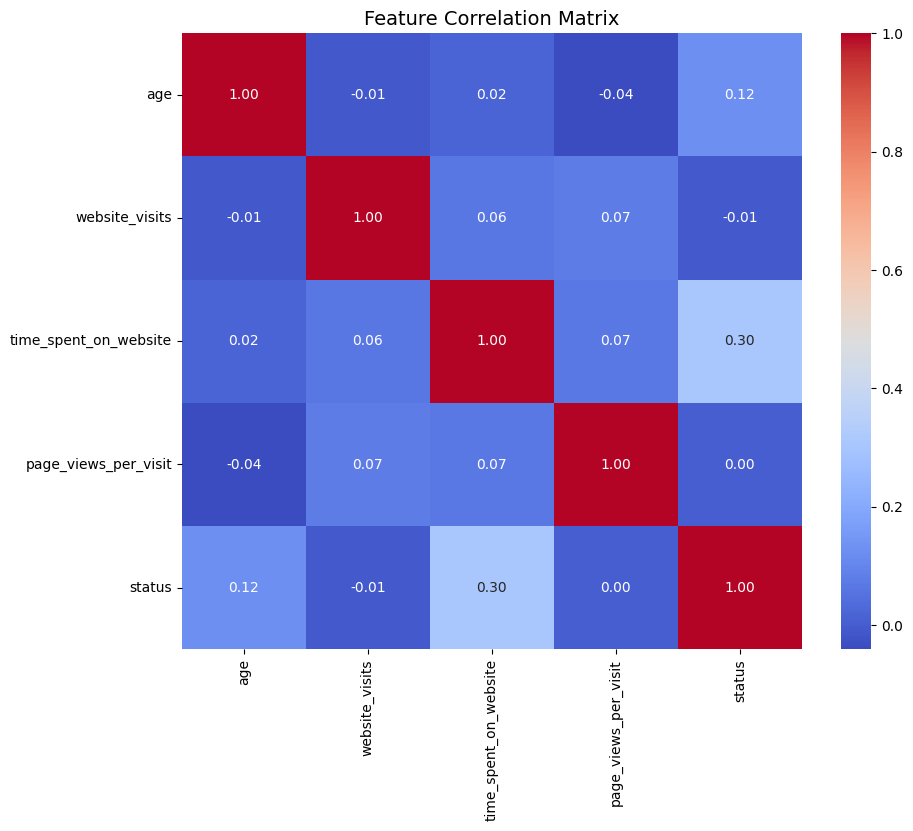

In [15]:
# Correlation heatmap
# Select numeric columns only
numeric_columns = ['age', 'website_visits', 'time_spent_on_website',
                   'page_views_per_visit', 'status']

# Calculate the correlation matrix (how features relate to each other)
corr_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize correlation
plt.figure(figsize=(10, 8))  # Set size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Show numbers with 2 decimal places
plt.title('Feature Correlation Matrix', fontsize=14)  # Add a title
plt.show()



Time spent on the website is the most useful feature for predicting conversion.
The only meaningful correlation is between time_spent_on_website and status (0.30): leads who spend more time on the website are more likely to convert. Other features have almost no correlation with conversion

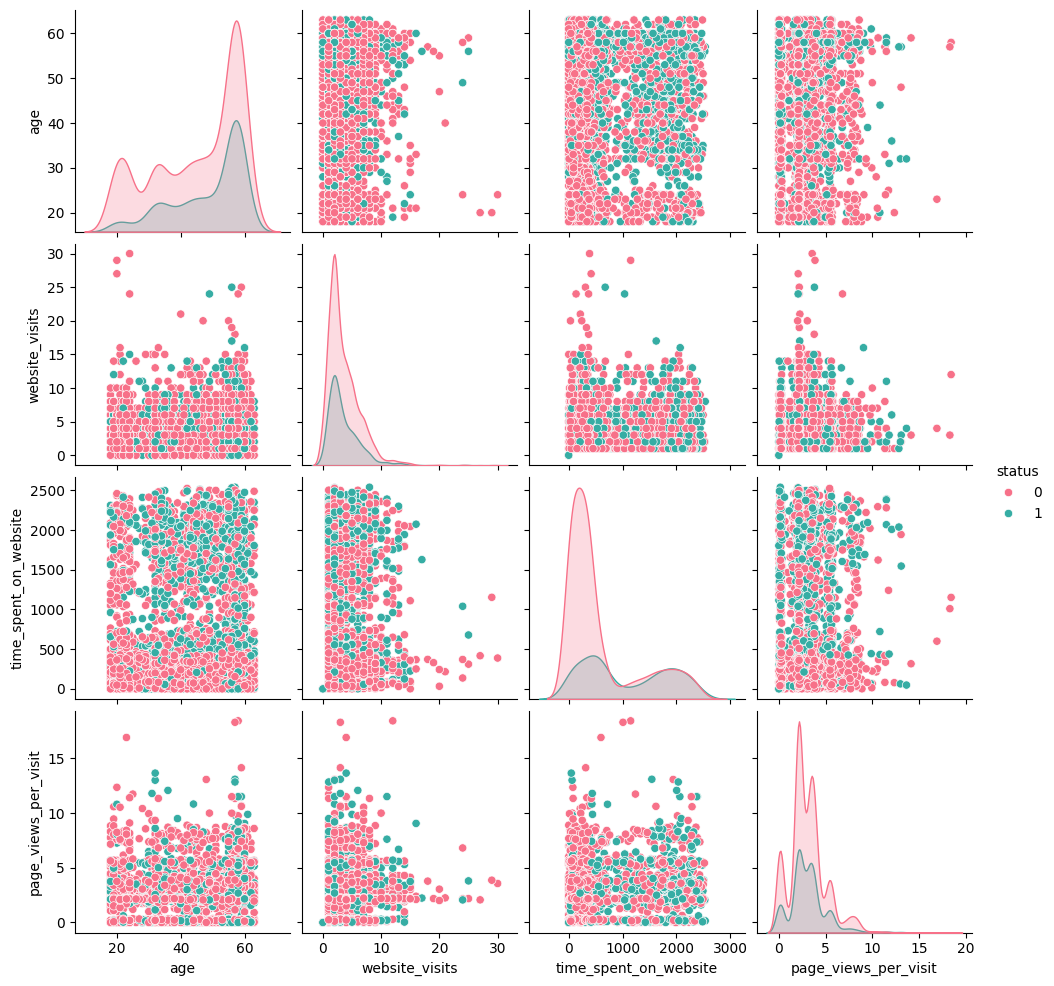

In [16]:
# Pairplot for numeric features
sns.pairplot(df[['age','website_visits','time_spent_on_website','page_views_per_visit','status']], hue='status', palette='husl')
plt.show()


People who spend more time and sometimes view more pages are more likely to convert.
Other features like age and website visits show weaker patterns.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.


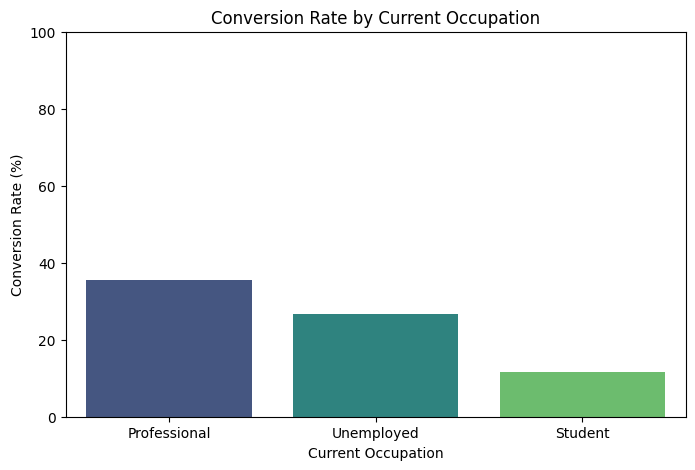

In [17]:
# Calculate conversion rate by occupation
occupation_conv = df.groupby('current_occupation')['status'].mean().sort_values(ascending=False) * 100

# Plot conversion rate by occupation
plt.figure(figsize=(8,5))
sns.barplot(x=occupation_conv.index, y=occupation_conv.values, palette='viridis')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Current Occupation')
plt.title('Conversion Rate by Current Occupation')
plt.ylim(0, 100)
plt.show()



People with jobs are more likely to become customers.
Maybe they have more money or clear plans.
Students convert the least, maybe because they are just exploring or cannot pay yet.

**Questions**
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?


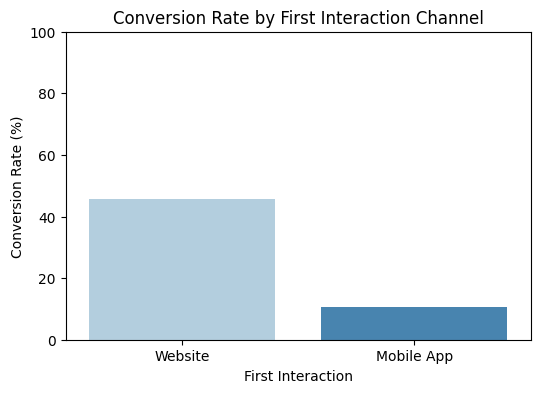

In [18]:
# Calculate conversion rate by first interaction
interaction_conv = df.groupby('first_interaction')['status'].mean().sort_values(ascending=False) * 100

# Plot conversion rate by first interaction
plt.figure(figsize=(6,4))
sns.barplot(x=interaction_conv.index, y=interaction_conv.values, palette='Blues')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('First Interaction')
plt.title('Conversion Rate by First Interaction Channel')
plt.ylim(0, 100)
plt.show()


Users who come through the website are much more likely to become paying customers.
This might be because they get more information or are more serious.

**Questions**
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?


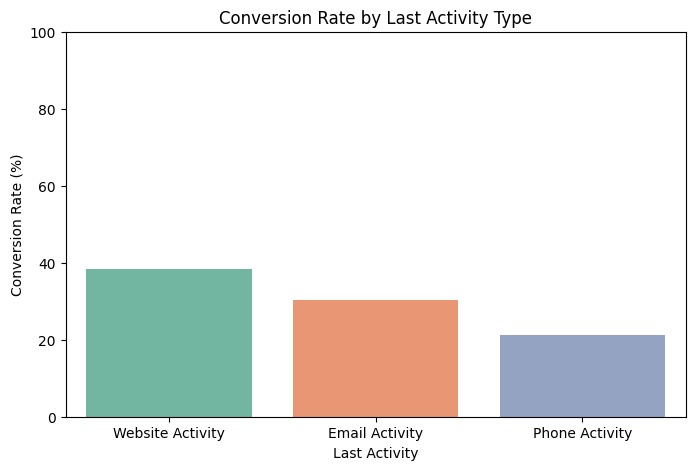

In [19]:
# Calculate conversion rate by last activity
activity_conv = df.groupby('last_activity')['status'].mean().sort_values(ascending=False) * 100

# Plot conversion rate by last activity
plt.figure(figsize=(8,5))
sns.barplot(x=activity_conv.index, y=activity_conv.values, palette='Set2')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Last Activity')
plt.title('Conversion Rate by Last Activity Type')
plt.ylim(0, 100)
plt.show()


The website works best.
Leads who last interacted with the website are more likely to convert.
Email also works fairly well, but phone calls are less effective.

**Questions**
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?


In [20]:
 # Conversion Rate by Channel

 # List of channel columns
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

conversion_rates = {}
for channel in channels:
    rate = df[df[channel] == 'Yes']['status'].mean() * 100
    conversion_rates[channel] = rate

conversion_rates = pd.Series(conversion_rates)
conversion_rates


,0
print_media_type1,31.991952
print_media_type2,32.188841
digital_media,31.878558
educational_channels,27.943262
referral,67.741935


People who come from referrals are much more likely to become customers.
Other channels (like ads in print or online) have similar, but lower, results.

**Questions**
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

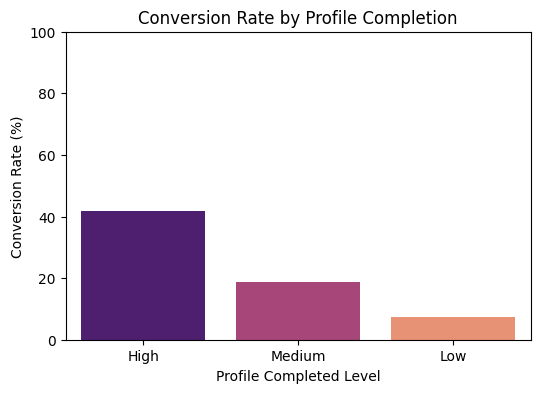

In [21]:
# Calculate conversion rate by profile completion
profile_conv = df.groupby('profile_completed')['status'].mean().sort_values(ascending=False) * 100

# Plot conversion rate by profile completion
plt.figure(figsize=(6,4))
sns.barplot(x=profile_conv.index, y=profile_conv.values, palette='magma')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Profile Completed Level')
plt.title('Conversion Rate by Profile Completion')
plt.ylim(0, 100)
plt.show()


The more complete the profile, the more likely the person will convert.
When users give more personal info, they are usually more interested and serious.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [22]:
# Missing Value
# Check for missing values
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


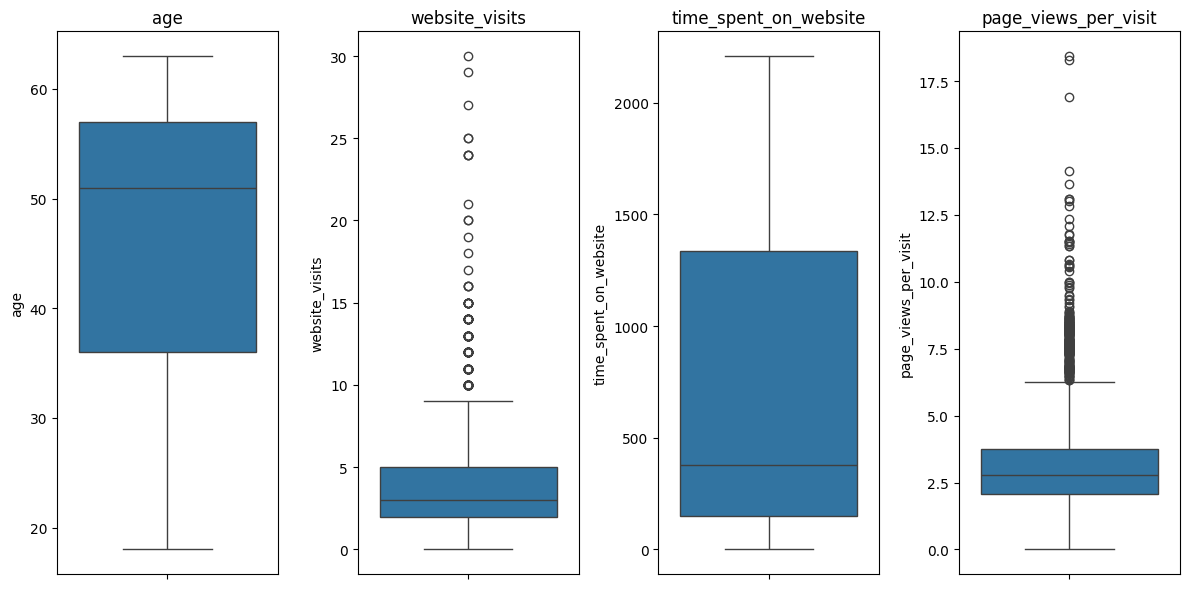

In [37]:
# outlier

# List of numerical columns
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Draw boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


Some outliers exist in time_spent_on_website, we can cap them to avoid model distortion.

In [51]:
# Cap values above 95th percentile in time_spent_on_website
q95 = df['time_spent_on_website'].quantile(0.95)
df['time_spent_on_website'] = df['time_spent_on_website'].clip(upper=q95)


In [52]:
# data preperation

# Feature Engineering — Convert website_visits to bin categories
bins = [-1, 0, 2, 5, 10, 100]
labels = ['0', '1-2', '3-5', '6-10', '>10']
df['website_visits_bin'] = pd.cut(df['website_visits'], bins=bins, labels=labels)

# Convert bin labels (strings) to numbers
le = LabelEncoder()
df['website_visits_bin_encoded'] = le.fit_transform(df['website_visits_bin'].astype(str))

# Convert Yes/No columns to 1 and 0
yes_no_cols = ['print_media_type1', 'print_media_type2', 'digital_media',
               'educational_channels', 'referral']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode categorical features
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])





In [53]:
# Drop unnecessary columns before modeling
df = df.drop(columns=['ID', 'website_visits_bin'])  # we drop the string bin column

# Split into features and target
X = df.drop('status', axis=1)
y = df['status']

## Building a Decision Tree model

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Train Decision Tree model
model_Tree = DecisionTreeClassifier(random_state=42)
model_Tree.fit(X_train, y_train)
y_pred = model_Tree.predict(X_test)

## Model Performance evaluation and improvement

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Evaluation Results for: {model_name}")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [57]:
evaluate_model(y_test, y_pred, model_name="model_tree")

Evaluation Results for: model_tree
----------------------------------------
Accuracy: 0.8320693391115926
Precision: 0.7297297297297297
Recall: 0.6897810218978102
F1 Score: 0.7091932457786116

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       649
           1       0.73      0.69      0.71       274

    accuracy                           0.83       923
   macro avg       0.80      0.79      0.80       923
weighted avg       0.83      0.83      0.83       923



In [58]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create model
dt = DecisionTreeClassifier(random_state=42)

# Set up grid search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and its parameters
best_tree = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Predict and evaluate
y_pred_best = best_tree.predict(X_test)
evaluate_model(y_test, y_pred_best, model_name="Decision Tree (Grid Search)")


Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Evaluation Results for: Decision Tree (Grid Search)
----------------------------------------
Accuracy: 0.8656554712892741
Precision: 0.7906976744186046
Recall: 0.7445255474452555
F1 Score: 0.7669172932330827

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       649
           1       0.79      0.74      0.77       274

    accuracy                           0.87       923
   macro avg       0.84      0.83      0.84       923
weighted avg       0.86      0.87      0.86       923



## Building a Random Forest model

In [60]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using our existing function
evaluate_model(y_test, y_pred_rf, model_name="Random Forest (Default)")


Evaluation Results for: Random Forest (Default)
----------------------------------------
Accuracy: 0.8537378114842904
Precision: 0.8061674008810573
Recall: 0.6678832116788321
F1 Score: 0.7305389221556886

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       649
           1       0.81      0.67      0.73       274

    accuracy                           0.85       923
   macro avg       0.84      0.80      0.82       923
weighted avg       0.85      0.85      0.85       923



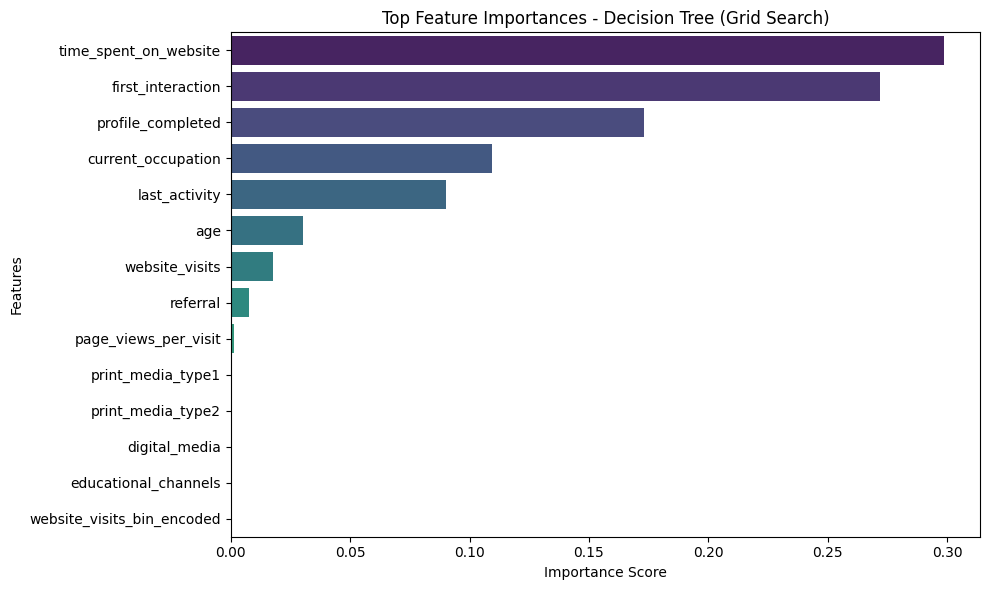

In [69]:
# Get feature importances from the best model
importances = best_tree.feature_importances_

# Match importances with feature names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top Feature Importances - Decision Tree (Grid Search)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Feature Importance – Decision Tree (Grid Search)

The top feature is **time\_spent\_on\_website** – users who stay longer are more likely to convert.
Next is **first\_interaction** – leads from some channels (like the app) convert better.
**Profile\_completed** also matters – more completed profiles mean higher interest.
**Occupation** and **last\_activity** help too – working and active users convert more.
Features like **referral** and **website\_visits** are helpful but less strong.
Some features (like **print media** and **page\_views**) have very low impact.


## Model Performance evaluation and improvement

In [61]:
# Random foarest / Grid

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create model
rf = RandomForestClassifier(random_state=42)

# Grid search setup
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Predict and evaluate
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
evaluate_model(y_test, y_pred_best_rf, model_name="Random Forest (Grid Search)")
print("Best Parameters:", grid_rf.best_params_)


Evaluation Results for: Random Forest (Grid Search)
----------------------------------------
Accuracy: 0.8699891657638137
Precision: 0.8377192982456141
Recall: 0.6970802919708029
F1 Score: 0.7609561752988048

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.84      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


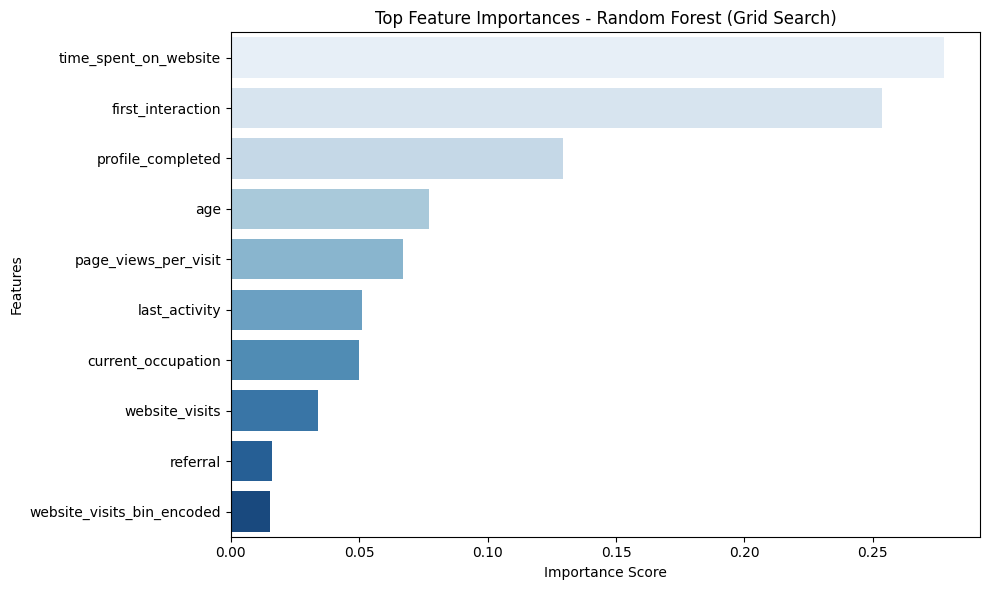

In [70]:
# Get feature importances from best Random Forest model
rf_importances = best_rf.feature_importances_

# Create DataFrame to match features and scores
rf_feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
})

# Sort by importance
rf_feature_df = rf_feature_df.sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_df.head(10), palette='Blues')
plt.title('Top Feature Importances - Random Forest (Grid Search)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Feature Importance – Random Forest
The most important feature is time_spent_on_website. Users who spend more time are more likely to convert.
First_interaction also matters — the first way users come to ExtraaLearn affects conversion.
Profile_completed shows that users with more complete profiles are more serious.
Other useful features include age, page_views_per_visit, and last_activity.
Some features like referral and website_visits_bin_encoded have very low impact.

This helps the company focus on better channels and more engaged users.

In [65]:
# XB boost
from xgboost import XGBClassifier


# Define model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}

# GridSearch setup
grid_xgb = GridSearchCV(xgb, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Predict and evaluate
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

evaluate_model(y_test, y_pred_xgb, model_name="XGBoost (Grid Search)")
print("Best Parameters:", grid_xgb.best_params_)


Evaluation Results for: XGBoost (Grid Search)
----------------------------------------
Accuracy: 0.8808234019501625
Precision: 0.8388429752066116
Recall: 0.7408759124087592
F1 Score: 0.7868217054263565

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       649
           1       0.84      0.74      0.79       274

    accuracy                           0.88       923
   macro avg       0.87      0.84      0.85       923
weighted avg       0.88      0.88      0.88       923

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [67]:
# Define a function to collect evaluation metrics
def get_model_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

# Dictionary to store results of all models
results = {}

# Predict and evaluate: Decision Tree
y_pred_tree = model_Tree.predict(X_test)
results["Decision Tree"] = get_model_metrics(y_test, y_pred_tree)

# Predict and evaluate: Random Forest (Default)
y_pred_rf = rf_model.predict(X_test)
results["Random Forest"] = get_model_metrics(y_test, y_pred_rf)

# Predict and evaluate: Random Forest (with Grid Search)
y_pred_rf_grid = best_rf.predict(X_test)
results["Random Forest (Grid)"] = get_model_metrics(y_test, y_pred_rf_grid)

# Predict and evaluate: XGBoost (with Grid Search)
y_pred_xgb = best_xgb.predict(X_test)
results["XGBoost (Grid)"] = get_model_metrics(y_test, y_pred_xgb)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)


results_df


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.832,0.730,0.690,0.709
Random Forest,0.854,0.806,0.668,0.731
Random Forest (Grid),0.870,0.838,0.697,0.761
XGBoost (Grid),0.881,0.839,0.741,0.787


XGBoost (Grid Search) is the best model for ExtraaLearn.
It has the highest Recall (0.741) and F1 Score (0.787), which means:

It is the most effective model in identifying which leads are likely to convert into paying customers.

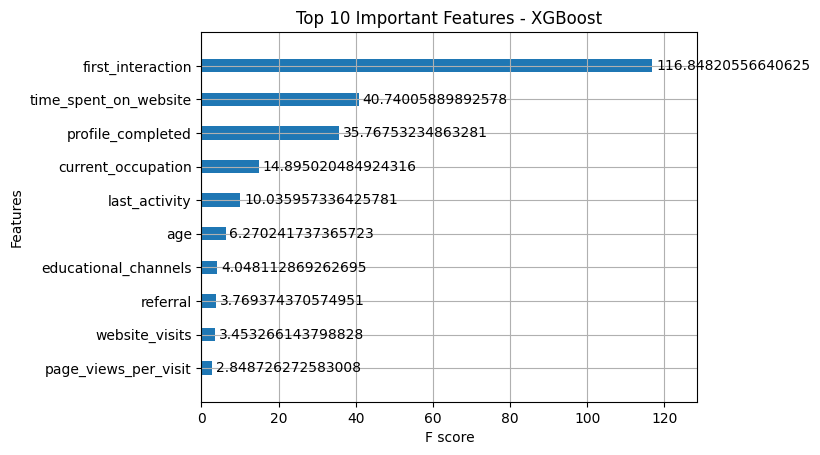

In [68]:
# Feature Importance from XGBoost
import xgboost as xgb

xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=10, height=0.4)
plt.title("Top 10 Important Features - XGBoost")
plt.show()


## Actionable Insights and Recommendations


### Interpretation of Top Features (XGBoost)

These are the top 10 important features:

1. **First Interaction**
   This is the most important feature. It shows how the user first came to ExtraaLearn (from website or mobile app). Leads from some channels are more likely to convert.

2. **Time Spent on Website**
   Users who spend more time on the website are more interested. They have a higher chance to convert.

3. **Profile Completed**
   If the lead fills more of their profile (up to 100%), they are more serious. These leads often become paid customers.

4. **Current Occupation**
   People who have a job (professionals) convert more than students or unemployed leads.

5. **Last Activity**
   If a lead did something recently (like chatting or clicking something), it means they are active and more likely to convert.

6. **Age**
   Age also matters. In my analysis, older users (maybe 30–50) have a higher chance to convert.

7. **Educational Channels**
   If someone found ExtraaLearn on forums or learning websites, it helps in conversion. These users may already care about education.

8. **Referral**
   When a user joins from a friend’s suggestion, they are more likely to trust and convert.

9. **Website Visits**
   Leads who visit the site many times may be interested, but not all of them convert. It depends on other factors too.

10. **Page Views per Visit**
    If a user views more pages in one visit, they might be exploring. But this alone is not a strong signal.

Some features like **first interaction**, **time spent**, and **profile completion** are strong signals for conversion.
This can help ExtraaLearn focus on better channels, improve the website, and ask users to complete their profiles.



### Key Recommendations

1. **Make the first contact more effective**
   Users who come from the mobile app or website convert better. Improve these channels by making the design simple and the content clear.

2. **Help users stay longer on the website**
   Leads who spend more time on the site are more likely to convert. Add videos, course previews, or chat support to keep them engaged.

3. **Ask users to complete their profile**
   Users with full profiles are more serious. Show a friendly message or reminder after they browse a few pages, asking them to complete missing details.

4. **Focus on working professionals**
   Professionals convert more than students. Create short learning paths or ads just for them, using LinkedIn or job-related platforms.

5. **Use referrals and educational websites**
   Leads from referrals or education forums are better. Offer simple rewards (like discounts) for referrals and share ExtraaLearn on learning communities.

